## **CNN with MNIST Data**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [2]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

11501568/11490434 [==============================] - 5s 0us/step


In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [5]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
X_train[5].shape

(28, 28)

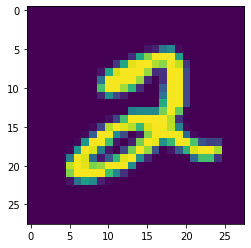

In [7]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [8]:
y_train[5]

2

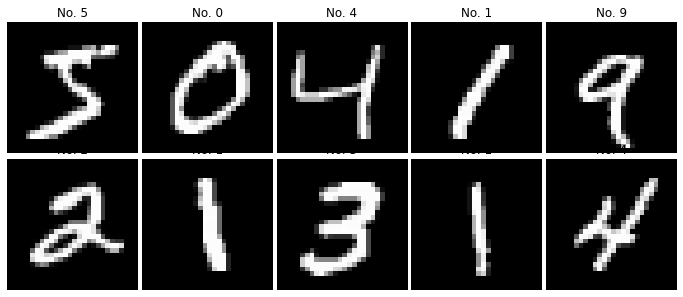

In [9]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [10]:
X_train[5].min()

0

In [11]:
X_train[5].max()

255

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255 # değerleri 0 ile 1 araınsa sıkıştırdım

In [15]:
X_train[5].min()

0.0

In [16]:
X_train[5].max()

1.0

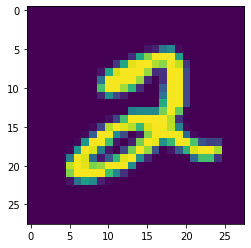

In [17]:
plt.imshow(X_train[5])

In [18]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [19]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [20]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [21]:
from tensorflow.keras.utils import to_categorical

In [23]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape 
# categorical kullanarak test ve trainleri karegorik veriye yani 1,2,3,4,56,7,8,9 diye yazılan sayıları kategororik yaptım.
#yapmasaydım buçuklu çıkacaktı ama benim el yazımda buçuklu sayı yok rakamlar var o rakamları calssification yaptım

(10000, 10)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
#yoğun imagelar için kerne_size fazla gire bilirsin
# veriye bağlı kafama göre giremem 28*28 lik veriye 26*26 yazamam. 1 e de siyah beyazsa yaza bilirim renkliyse 3 yazmalıyız

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten()) # verim basit olduğu için birer tane conv ve maxpool kullandım karışıksa bir kaçtane daha altına ekle

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax')) 
# burada çıktımız 10 classa ayrıldığı için 10 yazdık ve classification da her zaman softmax yazmalıyız.

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [30]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1471 - accuracy: 0.9561 - val_loss: 0.0718 - val_accuracy: 0.9758
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0508 - accuracy: 0.9846 - val_loss: 0.0479 - val_accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.0363 - val_accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0410 - val_accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0448 - val_accuracy: 0.9864


In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
model.history.history

{'loss': [0.14705561101436615,
  0.050771623849868774,
  0.03198803588747978,
  0.02055990882217884,
  0.014936704188585281],
 'accuracy': [0.9561333060264587,
  0.98458331823349,
  0.9897666573524475,
  0.9933666586875916,
  0.9949666857719421],
 'val_loss': [0.07184716314077377,
  0.047888267785310745,
  0.03631961718201637,
  0.04098786786198616,
  0.04484686627984047],
 'val_accuracy': [0.9757999777793884,
  0.9833999872207642,
  0.9879999756813049,
  0.9864000082015991,
  0.9864000082015991]}

In [33]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.147056,0.956133,0.071847,0.9758
1,0.050772,0.984583,0.047888,0.9834
2,0.031988,0.989767,0.036320,0.9880
3,0.020560,0.993367,0.040988,0.9864
4,0.014937,0.994967,0.044847,0.9864


Text(0.5, 0, 'Epoch')

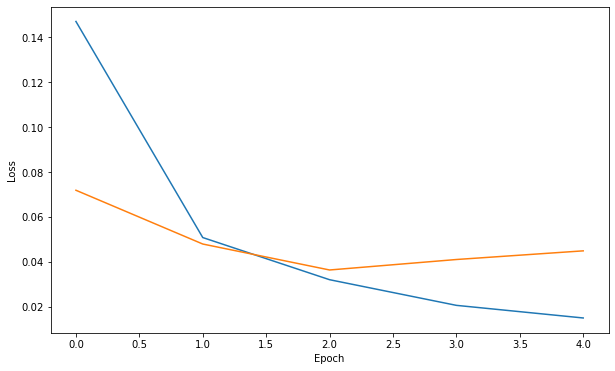

In [34]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

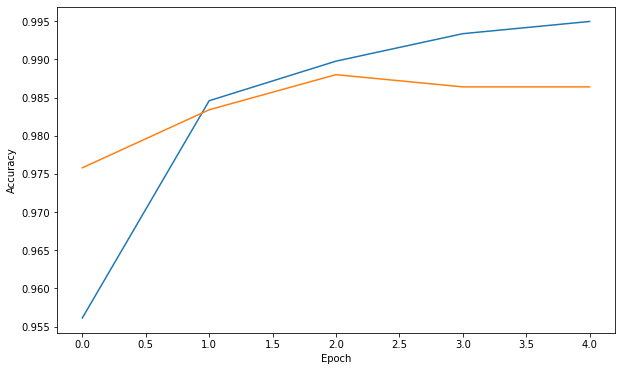

In [35]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

In [36]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 2s 6ms/step - loss: 0.0448 - accuracy: 0.9864
[0.04484686627984047, 0.9864000082015991]


In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
preds = model.predict(X_test)



In [39]:
predictions= np.argmax(preds, axis=1) # her satırdaki en büyük predic tahmin değeri

In [40]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [42]:
print(confusion_matrix(y_test, predictions))

[[ 974    1    1    0    0    1    1    2    0    0]
 [   0 1127    2    2    1    0    1    2    0    0]
 [   0    3 1018    1    0    0    0    9    1    0]
 [   0    0    2 1004    0    1    0    1    1    1]
 [   0    0    2    0  970    0    0    1    1    8]
 [   0    0    1    9    0  879    2    0    0    1]
 [   6    3    1    1    1    4  940    0    2    0]
 [   0    0    3    3    0    0    0 1019    2    1]
 [   3    0    6    5    0    2    0    4  948    6]
 [   1    3    0    3    8    1    0    7    1  985]]


In [43]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04484686627984047
Test accuracy: 0.9864000082015991


In [45]:
my_number = X_test[0]

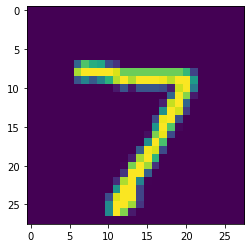

In [46]:
plt.imshow(my_number.reshape(28,28))

In [47]:
model.predict(my_number.reshape(1,28,28,1)) #en bştaki 1 satır ifade ediyor 

array([[2.1594651e-12, 5.3408327e-09, 4.0684967e-09, 1.5817976e-07,
        2.8715924e-11, 1.9370911e-12, 5.9012309e-16, 9.9999976e-01,
        1.3465515e-10, 8.8660677e-08]], dtype=float32)

In [48]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([7])

In [49]:
model.save("cnn-1.h5")